<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import factorial
import numpy as np
from scipy.stats import beta

from matplotlib.pyplot import plot, fill_between
from IPython import display


#Combinations
Given a set of n items how many distinct subsets of size k can you form? Order does not matter.

EX: How many ways can you get 2 heads when tossing a coin 3 times?

Spoken as "n choose k"  

Written as 
$n \choose k$ = $ \frac{n!}{k! (n-k)!}$

So for the example, $ 3 \choose 2$ = $ \frac 6 2 $ = 3

{HHT, HTH, THH}

Note: The "order does not matter" followed by an example where the order or position of the T seems to be the only difference seems contradictory. The most coherent explanation I have found is [combinations and permutations in coin tossing](https://math.stackexchange.com/questions/1243182/combinations-and-permutations-in-coin-tossing)

In [0]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

# Binomial Distribution
Given n binary trials, what is the probability of k successes assuming that the probability of success in a single trial is p?

If you got all of the successes first and then all of the failures the probability would be $ p^k (1-p)^{(n-k)}$   

But the successes don't have to come first, there are many ways that we can get k successes in n trials. Specifically, there are $ n \choose k $ ways.

So, if the probability of success in a single trial is p then the total probability of k successes in n trials is:

Binomial = ${n \choose k} p^k (1-p)^{(n-k)}$

In [0]:
def binomial(n,p):
  def distribution(k):
    return comb(n, k) * p**k * (1-p)**(n-k)

  return distribution

## Examples

In [0]:
# n = 7, p = 1/5
p = binomial(7,1/5)

In [5]:
# Probability of at least 2 successes
sum([p(k) for k in range(2,8)])

0.4232832000000002

In [0]:
# n = 25, p = 1/10
p2 = binomial(25,1/10)


In [7]:
# Probability of at least 2 successes
sum([p2(k) for k in range(2,26)])

0.7287940935386341

# Working Backwards from data
Given a sample outcome, what can we learn about the single trial probability of success?

EX: If we had 60 heads in 100 trials what does that tell us about a single throw?

We generate a new function that takes the single trial probability as an argument and answers with the probabilty of getting the given number of successes in the given number of trials.



In [0]:
def binomial_p(n,k):
  def distribution(single_trial_p):
    return comb(n, k) * single_trial_p**k * (1-single_trial_p)**(n-k)

  return distribution

In [0]:
num_points = 200
trial_ps = [p/num_points for p in range(0,num_points+1, 1)]

Each dot indicates how likely the 60 successes in 100 trials is at the specified probability of a success in a single trial


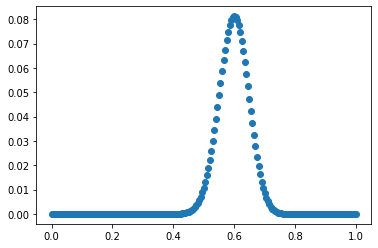

In [10]:
binomial_100_60 = binomial_p(100, 60)
probabilities = [binomial_100_60(p) for p in trial_ps]
plot(trial_ps, probabilities, 'o')
area_under_curve = sum(probabilities)
print('Each dot indicates how likely the 60 successes in 100 trials is at the specified probability of a success in a single trial')


Note: The shape is useful, but this is not a pmf - it doesn't sum to 1.


In [11]:
print('approximate area under curve', area_under_curve)

approximate area under curve 1.9801980198019804


area under normalized curve 0.9999999999999999


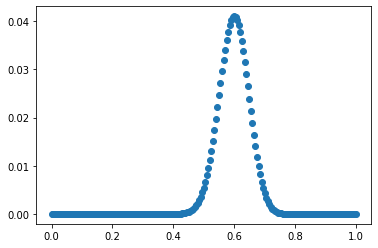

In [12]:
normalized_probabilities = [p/area_under_curve for p in probabilities]
plot(trial_ps, normalized_probabilities, 'o')
print('area under normalized curve', sum(normalized_probabilities))


If our goal is the normalized distribution or pmf then we are doing extra work - each value is scaled up by the ${n \choose k} $ then scaled by the sum of all of the values.   

The shape of the curve is entirely determined by $p^k (1-p)^{(n-k)}$

I wouldn't believe me either, let's try it out...

In [0]:
def simplified_binomial_p(n,k):
  def distribution(p):
    return p**k * (1-p)**(n-k)

  return distribution

approximate area under curve 1.4405385495391127e-28
approximate area under normalized curve 0.9999999999999999


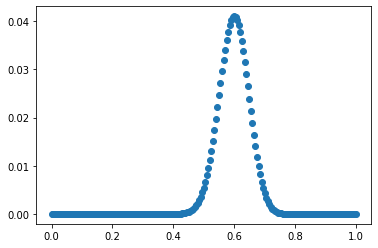

In [14]:
simplified_binomial_100_60 = simplified_binomial_p(100, 60)
simplified_probabilities = [simplified_binomial_100_60(p) for p in trial_ps]
area_under_simplified_curve = sum(simplified_probabilities)
normalized_simplified_probablities = [p/area_under_simplified_curve for p in simplified_probabilities]

print('approximate area under curve', area_under_simplified_curve)
print('approximate area under normalized curve', sum(normalized_probabilities))

plot(trial_ps, normalized_simplified_probablities, 'o')


In [15]:
print(normalized_probabilities[100], normalized_simplified_probablities[100])

0.005476152689377183 0.005476152689377183


##Sample usage of normalized binomial

Data is 4 heads in 10 flips
What is the probability that the per trial probability of heads is more than 60%?

In [0]:
num_points = 20*1000
trial_ps = [p/num_points for p in range(0,num_points+1, 1)]

simplified_binomial_10_4 = simplified_binomial_p(10, 4)
simplified_probabilities = [simplified_binomial_10_4(p) for p in trial_ps]
area_under_simplified_curve = sum(simplified_probabilities)
normalized_simplified_probablities = [p/area_under_simplified_curve for p in simplified_probabilities]

sum P(trial_p < 60 =  0.9006167657687058
sum P(trial_p > 60 =  0.09938323423129579


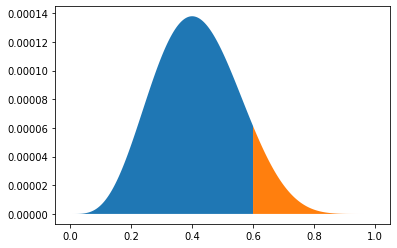

In [17]:
sixty_percent_of_points = round(num_points*.6)
probs_less_than_60 = normalized_simplified_probablities[0:sixty_percent_of_points]
fill_between(trial_ps[0:sixty_percent_of_points], probs_less_than_60)
print('sum P(trial_p < 60 = ', sum(probs_less_than_60))

probs_greater_than_60 = normalized_simplified_probablities[sixty_percent_of_points:]
fill_between(trial_ps[sixty_percent_of_points:], probs_greater_than_60)
print('sum P(trial_p > 60 = ', sum(probs_greater_than_60))

## Beta Distribution
Our normalized discrete pmf from the Binomial distribution works. But of course there is a smoother and easier continous solution: The Beta distribution which gives you a nice PDF.

Beta($ p, \alpha, \beta) = \frac {p^{\alpha-1} (1-p)^{\beta-1}} {beta(\alpha,\beta)}$

Where beta is $ \int_0^1 p^{\alpha-1} (1-p)^{\beta-1} dp$

Hopefully this looks familiar - our normalization of the Binomial was just numerical integration of the area under the Binomial curve and we too abandoned the $ n\choose k $ when we normalized. 

I am going to wave my hands over the $ \alpha-1 $ and $ \beta-1 $ and walk away. It totally works... Python wouldn't lie...

In [18]:
from_beta = 1 - beta.cdf([.6], 4, 6)[0]
print('per beta distribution, P(trial_p > 60) = ', from_beta)
print('difference = ', from_beta - sum(probs_greater_than_60))

per beta distribution, P(trial_p > 60) =  0.09935257600000003
difference =  -3.065823129576317e-05


Data is 9 heads and 11 tails. What is the probability that the coin is fair by the definition of 0.45 < p < 0.55?

In [22]:
probabilities  = beta.cdf([0.45, 0.55], 9, 11)
probabilities[1] - probabilities[0]


0.3098800156513042

Data is 109 heads and 111 tails. 


In [23]:
probabilities  = beta.cdf([0.45, 0.55], 109, 111)
probabilities[1] - probabilities[0]

0.8589371426532354

In [32]:
# could it happen with at least a 0.55 bias on the coin?
probabilities  = beta.cdf([0.55, 1], 109, 111)
probabilities[1] - probabilities[0]

0.05256460037498634